<a href="https://colab.research.google.com/github/sanket-buyhatke/bitbns-rest-endpoints/blob/master/bitcoin_seasonality_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bitcoin seasonality study

To explore if bitcoin returns are based on seasonality.

- get historical data for bitcoin, close price.
- compute dialy returns.
- resample to monthly and group by months and plot bar plot
- resample to monthly and plot heatmap
- check if any repeating pattern visually

## import all required libraries

In [ ]:
!pip install quantstats

In [ ]:
#import all required libraries
import pandas_datareader.data as web     #to fetch required data
from datetime import date                 

#data processing libraries
import pandas as pd
import numpy as np

#data visualization liraries
import matplotlib.pyplot as plt
import seaborn as sns
import quantstats as qs

## declare required variables 

In [ ]:
start_date = date(2015, 1, 1)  
end_date = date.today()

pair = 'BTC-USD'

## download historical data from yahoo finance. 

In [ ]:
DF = web.DataReader(pair, 'yahoo', start_date, end_date)

In [ ]:
#get daily change
df = DF.copy()
df['pct_change'] = df['Close'].pct_change()
df = df['pct_change']
df = pd.DataFrame(df)

In [ ]:
df = df.rename(columns={'pct_change':pair})

## visualize returns

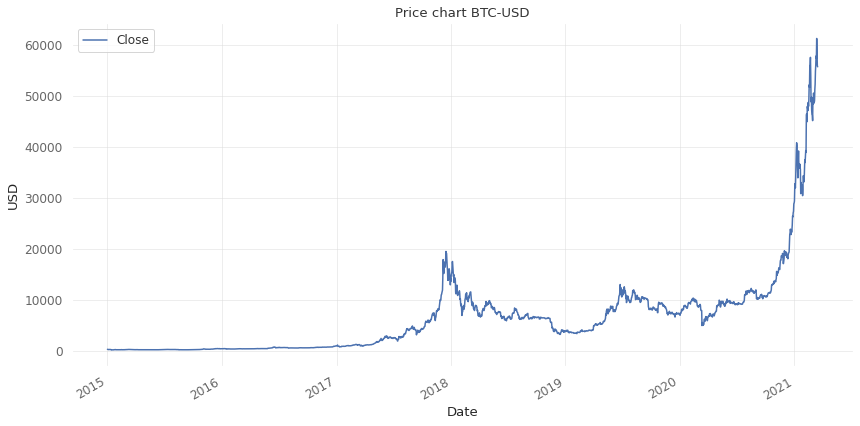

In [ ]:
DF['Close'].plot(
    figsize=(14,7),
    title=f"Price chart {pair}",
    legend=pair,
    xlabel='Date',
    ylabel=pair.split('-')[1],
    )

## visualizing returns

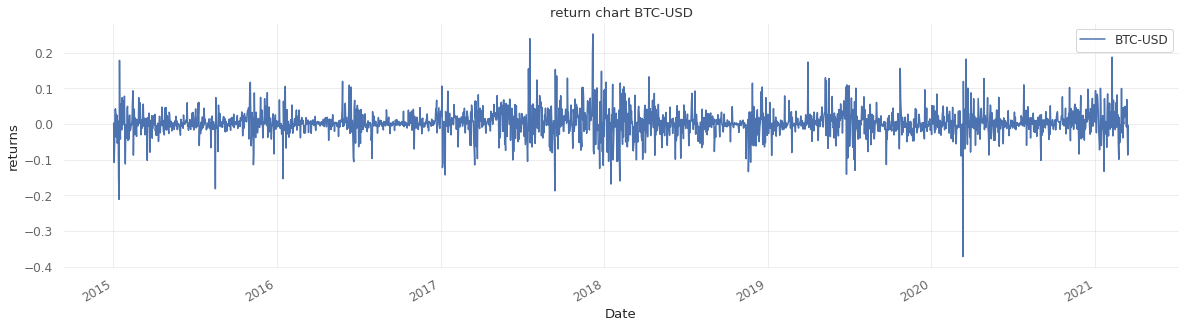

In [ ]:
df.plot(
    figsize=(20,5),
    title=f'return chart {pair}',
    legend='returns in pct%',
    xlabel='Date',
    ylabel='returns',
)

In [ ]:
#resample daily returns to monthly returns.
df_monthly = df.resample('M').sum()

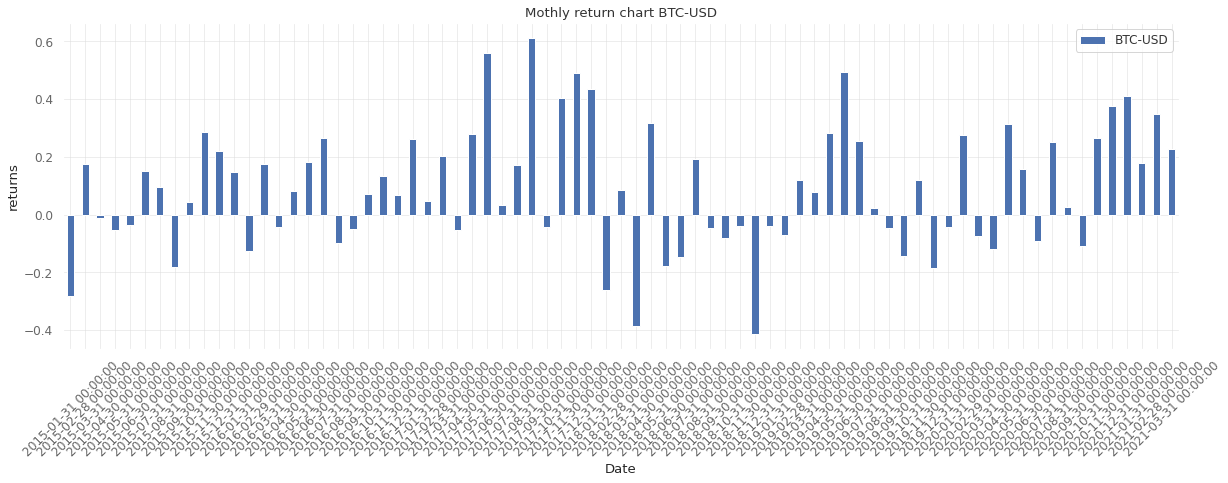

In [ ]:
#To view returns over the past months.
df_monthly.plot(
    kind='bar',
    figsize=(20,6),
    title=f'Mothly return chart {pair}',
    legend='returns in pct%',
    xlabel='Date',
    ylabel='returns',
    style='r',
    rot=45,
    grid='true'
)

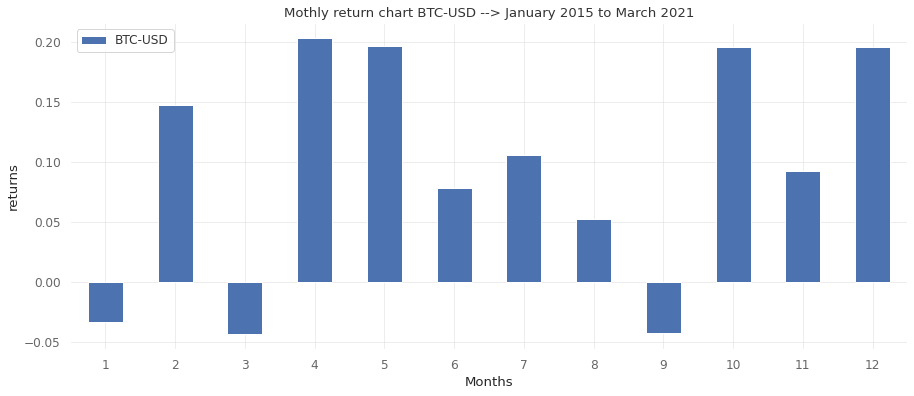

In [ ]:
#To view returns based on monthly average over the past few years
start_duration = f'{df_monthly.index[0].month_name()} {df_monthly.index[0].year}'
end_duration = f'{df_monthly.index[-1].month_name()} {df_monthly.index[-1].year}'

df_monthly.groupby(df_monthly.index.month).mean().plot(
    kind='bar',
    figsize=(15,6),
    title=f'Mothly return chart {pair} --> {start_duration} to {end_duration}',
    legend='returns in pct%',
    xlabel='Months',
    ylabel='returns',
    style='r',
    rot=0,
    grid='true'
    )

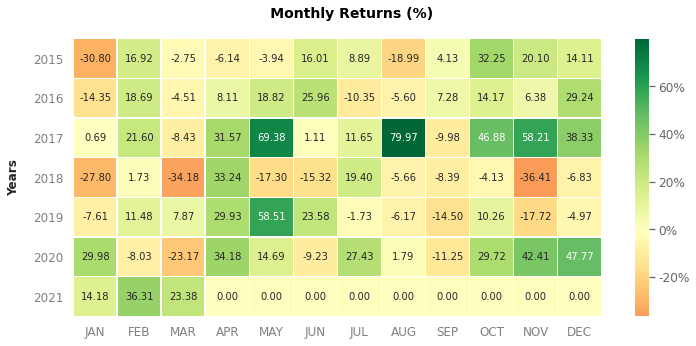

In [ ]:
#external lib to help visualize a heatmap of the returns
qs.plots.monthly_heatmap(df)

## conclusions

 - bitcoin returns does seems to exhibit a monthly seasonality, especially during Quarter 2( mostly April and May) and Quarter 4(October, November and December)